In [35]:
# Es necesaria una versión superior a Python 3.5

import sys

assert sys.version_info >= (3, 5)


# Es necesaria una versión de Scikit-Learn superior a ≥0.20

import sklearn

assert sklearn.__version__ >= "0.20"


# importaciones communes

import numpy as np

import os

# para hacer que la salida de este código sea estable en todas las ejecuciones

np.random.seed(42)

# para que muestre imágenes amigables

%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)

mpl.rc('xtick', labelsize=12)

mpl.rc('ytick', labelsize=12)

In [36]:
PROJECT_ROOT_DIR = "."

CHAPTER_ID = "clasificacion"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "imagenes", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)



def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)

    print("Imagen Guardada", fig_id)

    if tight_layout:

        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi=resolution)

### **MNIST**



*   # *Descargar el MNIST dataset*




In [37]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [38]:
X, y = mnist["data"], mnist["target"]

X.shape

(70000, 784)

In [39]:
print(len(X))

70000


In [40]:
y.shape

(70000,)

Imagen Guardada some_digit_plot


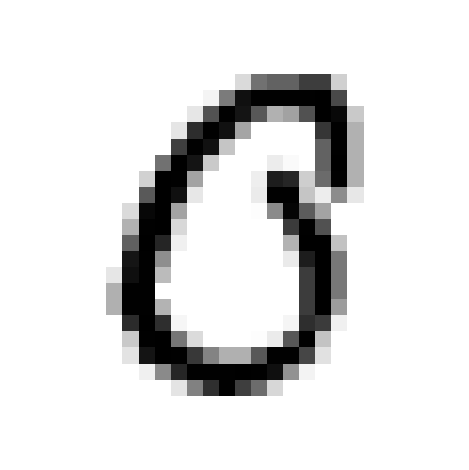

In [45]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[234]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
save_fig("some_digit_plot")

plt.show()

In [42]:
y[234]

'0'

In [43]:
y = y.astype(np.uint8)

In [44]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## **Entrenamiento de un clasificador binario**

In [46]:

y_train_7 = (y_train == 7)

y_test_7 = (y_test == 7)



## **Realizar dos modelos**

*   **KNN**
*   **RandomForest**




In [80]:
from sklearn.neighbors import KNeighborsClassifier
# Modelo KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)  # Crea el clasificador KNN con 3 vecinos
knn_clf.fit(X_train, y_train_7)
knn_clf.predict([some_digit])

array([False])

In [81]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train_7, cv=3, scoring="accuracy")



array([0.99435, 0.9922 , 0.99295])

In [51]:
from sklearn.ensemble import RandomForestClassifier
# Modelo RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_7)
rf_clf.predict([some_digit])

array([False])

In [53]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.98835, 0.988  , 0.9893 ])

## **Crear una matriz de confusion**

In [70]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train,y_train_7, cv=3)

In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[53500,   235],
       [  175,  6090]])

In [74]:
y_train_perfect_predictions = y_train_7

confusion_matrix(y_train_7, y_train_perfect_predictions)

array([[53735,     0],
       [    0,  6265]])

# **Calcular la precision, recall, threshold con precision_recall_curve()**

# Precision and Recall

In [82]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_7, y_train_pred)

0.9628458498023715

In [83]:
cm = confusion_matrix(y_train_7, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.9628458498023715

In [84]:
recall_score(y_train_7, y_train_pred)

0.9720670391061452

In [85]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.9720670391061452

In [86]:
from sklearn.metrics import f1_score

f1_score(y_train_7, y_train_pred)

0.9674344718030183

In [87]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.9674344718030182

# Precision/Recall Trade-off

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
import numpy as np

In [100]:
some_digit = X_test[0]
y_scores = knn_clf.predict_proba([some_digit])[:, 1]
print(y_scores)

[1.]


In [101]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [102]:
threshold = 0.8
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [104]:
y_scores = cross_val_predict(knn_clf, X_train, y_train_7, cv=3, method="predict_proba")[:, 1]

In [106]:
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

## **Graficar precision vs recall**

Imagen Guardada precision_vs_recall_plot


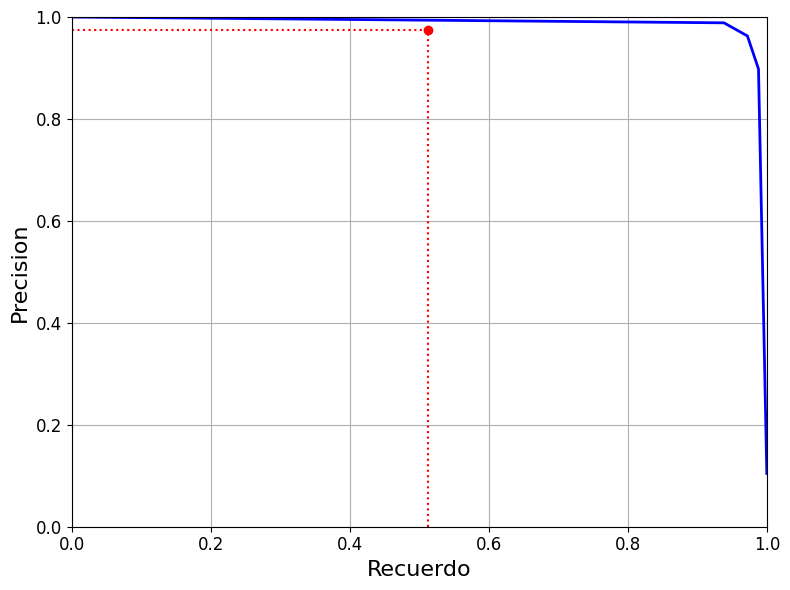

In [107]:
def plot_precision_vs_recall(precisions, recalls):

    plt.plot(recalls, precisions, "b-", linewidth=2)

    plt.xlabel("Recuerdo", fontsize=16)

    plt.ylabel("Precision", fontsize=16)

    plt.axis([0, 1, 0, 1])

    plt.grid(True)



plt.figure(figsize=(8, 6))

plot_precision_vs_recall(precisions, recalls)

plt.plot([0.5123, 0.5123], [0., 0.975], "r:")

plt.plot([0.0, 0.5123], [0.975, 0.975], "r:")

plt.plot([0.5123], [0.975], "ro")

save_fig("precision_vs_recall_plot")

plt.show()

In [109]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

threshold_90_precision

0.6666666666666666

In [110]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

precision_score(y_train_7, y_train_pred_90)

0.9628458498023715

In [111]:
recall_score(y_train_7, y_train_pred_90)

0.9720670391061452

# **Graficar precision vs threshold**

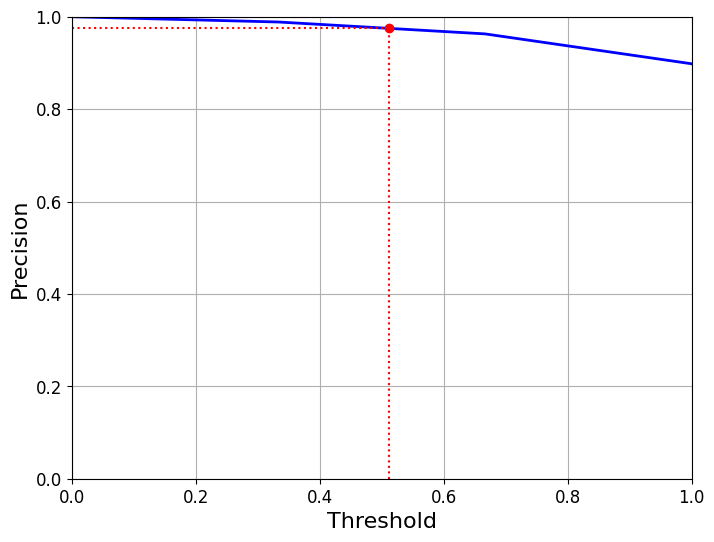

In [163]:
def plot_precision_vs_threshold(precisions, thresholds):
    plt.plot(thresholds, precisions, "b-", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_threshold(precisions, thresholds)
plt.plot([0.5123, 0.5123], [0., 0.975], "r:")
plt.plot([0.0, 0.5123], [0.975, 0.975], "r:")
plt.plot([0.5123], [0.975], "ro")
plt.show()


## **Graficar recall vs threshold**

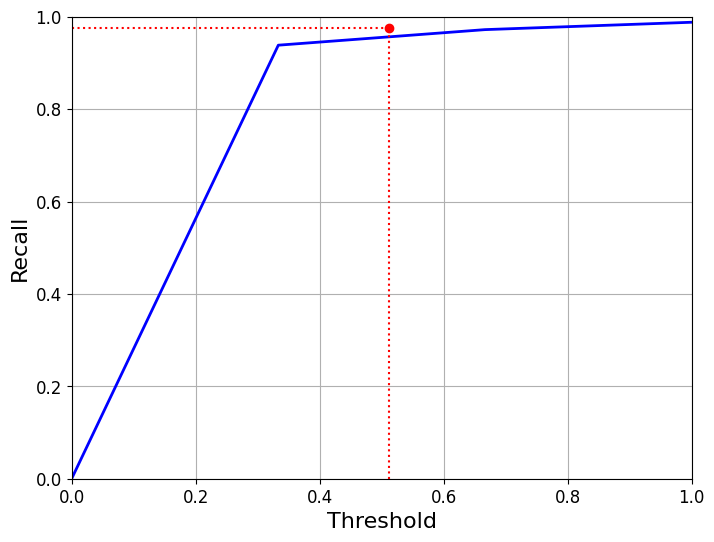

In [164]:
def plot_recall_vs_threshold(recalls, thresholds):
    plt.plot(thresholds, recalls, "b-", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Recall", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_recall_vs_threshold(recalls, thresholds)
plt.plot([0.5123, 0.5123], [0., 0.975], "r:")
plt.plot([0.0, 0.5123], [0.975, 0.975], "r:")
plt.plot([0.5123], [0.975], "ro")
plt.show()

# **Graficar curva ROC**

Imagen Guardada curva_roc


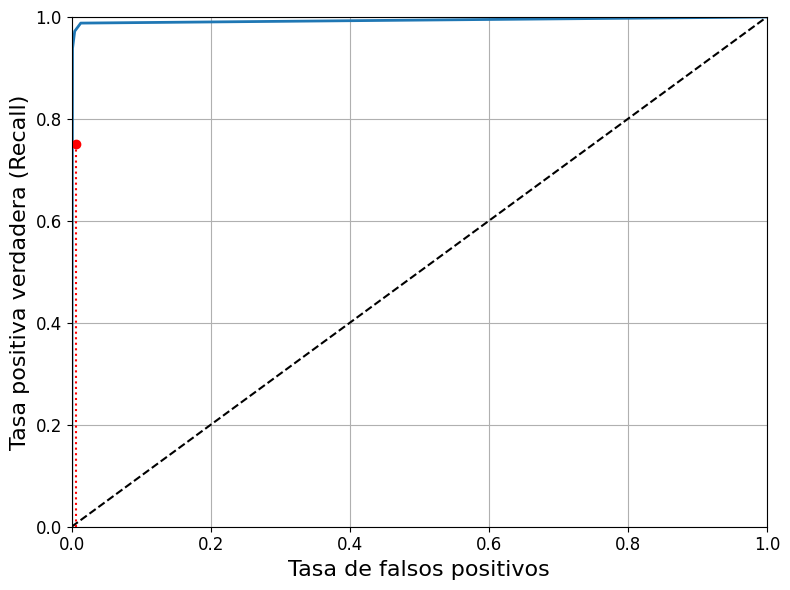

In [150]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

def muestra_curva_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # diagonal de puntos
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Tasa de falsos positivos', fontsize=16)
    plt.ylabel('Tasa positiva verdadera (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
muestra_curva_roc(fpr, tpr)

plt.plot([5.837e-3, 5.837e-3], [0., 0.75], "r:")
plt.plot([0.0, 5.837e-3], [0.75, 0.75], "r:")
plt.plot([5.837e-3], [0.75], "ro")

save_fig("curva_roc")
plt.show()


In [152]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_7, y_scores)

0.9931082977851388

In [153]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, method="predict_proba")

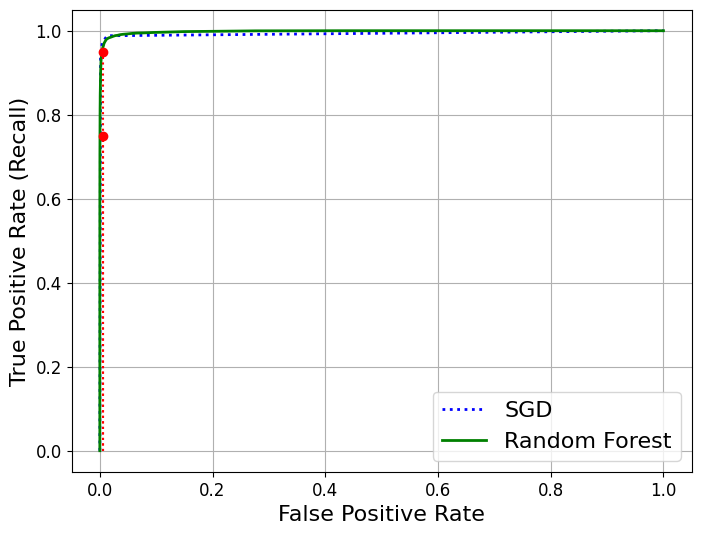

In [157]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "g-", linewidth=2, label="Random Forest")

plt.plot([5.837e-3, 5.837e-3], [0., 0.75], "r:")
plt.plot([0.0, 5.837e-3], [0.75, 0.75], "r:")
plt.plot([5.837e-3], [0.75], "ro")

plt.plot([5.837e-3, 5.837e-3], [0., 0.9487], "r:")
plt.plot([5.837e-3], [0.9487], "ro")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate (Recall)", fontsize=16)

plt.savefig("comparacion_curva_roc.png")
plt.show()


In [158]:
roc_auc_score(y_train_7, y_scores_forest)

0.9982747530426836

In [160]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3)
precision_score(y_train_7, y_train_pred_forest)

0.9867364746945899

In [161]:
recall_score(y_train_7, y_train_pred_forest)

0.9024740622505986